# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv
import json
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
cities

['butaritari',
 'kahului',
 'chake chake',
 'mar del plata',
 'mataura',
 'juegang',
 'east london',
 'busselton',
 'kuliyapitiya',
 'kampong chhnang',
 'punta arenas',
 'airai',
 'faanui',
 'richards bay',
 'rikitea',
 'vaini',
 'flin flon',
 'amderma',
 'bolshoy tsaryn',
 'vestbygda',
 'lixourion',
 'saryshagan',
 'ribeira grande',
 'kamina',
 'kizukuri',
 'hilo',
 'tuktoyaktuk',
 'bay roberts',
 'bilibino',
 'guerrero negro',
 'chokurdakh',
 'kutum',
 'hithadhoo',
 'banepa',
 'nome',
 'bathsheba',
 'attawapiskat',
 'hobart',
 'wanaka',
 'ushuaia',
 'mitsamiouli',
 'yomitan',
 'arraial do cabo',
 'ningan',
 'esperance',
 'upernavik',
 'bethel',
 'kapaa',
 'hermanus',
 'college',
 'illoqqortoormiut',
 'fortuna',
 'dakar',
 'tsihombe',
 'hanzhong',
 'terre-de-bas',
 'bargal',
 'chuy',
 'rawannawi',
 'matara',
 'narsaq',
 'jamestown',
 'port elizabeth',
 'berdigestyakh',
 'kargasok',
 'rawson',
 'saldanha',
 'chaman',
 'nichinan',
 'sayalgudi',
 'poum',
 'carballo',
 'qaanaaq',
 'khonuu

In [5]:
units = 'imperial'
city = 'charlestown'
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + city)
time.sleep(1.5)
res = response.json()


In [6]:
(res['sys']['country'])

'AU'

In [7]:
pprint(res)
pprint(res["clouds"]["all"])

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -32.95, 'lon': 151.67},
 'dt': 1580270103,
 'id': 2171766,
 'main': {'feels_like': 80.47,
          'humidity': 74,
          'pressure': 1015,
          'temp': 80.94,
          'temp_max': 84.99,
          'temp_min': 77},
 'name': 'Charlestown',
 'sys': {'country': 'AU',
         'id': 9605,
         'sunrise': 1580238762,
         'sunset': 1580288375,
         'type': 1},
 'timezone': 39600,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 150, 'speed': 16.11}}
75


In [8]:
City_ID=[]
City= []         
Cloudiness=[]
Country=[]
Date=[]    
Humidity=[]
Lat=[]   
Lng=[]   
Temp=[]
Max_Temp=[]
Wind_Speed=[]
counter=0
units = 'imperial'
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

for city in cities:
    try:
        response = requests.get(query_url + city)
        res = response.json()
        City_ID.append(counter)
        Lat.append(res['coord']['lat'])
        Lng.append(res['coord']['lon'])
        City.append(res['name'])
        Cloudiness.append(res['clouds']['all'])
        Country.append(res['sys']['country'])
        Humidity.append(res['main']['humidity'])
        Temp.append(res['main']['temp'])
        Max_Temp.append(res['main']['temp_max'])
        Date.append(res['dt'])
        Wind_Speed.append(res['wind']['speed'])
        time.sleep(1.5)
        counter+=1
    except KeyError:
        print("Skipped city. It doesn't exist")

KeyboardInterrupt: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
data = zip(City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Temp,Max_Temp,Wind_Speed)
rows = 9
labels = ['City ID','City','Cloudiness','Country','Date','Humidity','Lat','Lng','Temp','Max_Temp','Wind_Speed']
with open ("output.csv","w", newline="") as f:
    writer=csv.DictWriter(f, fieldnames = ['City ID','City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max_Temp','Wind_Speed'])
    writer.writeheader()
    writer=csv.writer(f)
    writer.writerows(data)

In [26]:
weather = pd.read_csv("output.csv")
weather.count()

City ID       550
City          550
Cloudiness    550
Country       547
Date          550
Humidity      550
Lat           550
Lng           550
Max_Temp      550
Wind_Speed    550
dtype: int64

In [ ]:
weather.head()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

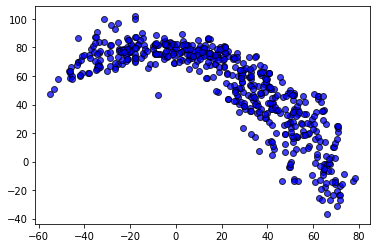

In [30]:
weather=weather.rename(columns={"Max_Temp":"MaxTemp"})
plt.scatter(weather.Lat,weather.Temp,marker="o", facecolors="blue", edgecolors="black",alpha=0.75)
plt.show()
plt.savefig(TempVsLat.png)

#### Latitude vs. Humidity Plot

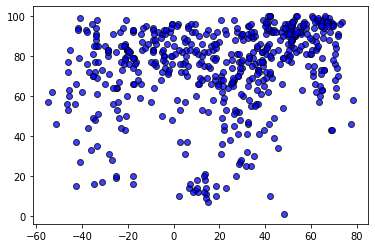

In [33]:
plt.scatter(weather.Lat,weather.Humidity,marker="o", facecolors="blue", edgecolors="black",alpha=0.75)
plt.show()
plt.savefig(HumidVsLat.png)

#### Latitude vs. Cloudiness Plot

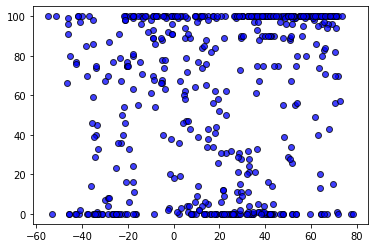

In [31]:
plt.scatter(weather.Lat,weather.Cloudiness,marker="o", facecolors="blue", edgecolors="black",alpha=0.75)
plt.show()
plt.savefig(CloudVsLat.png)

#### Latitude vs. Wind Speed Plot

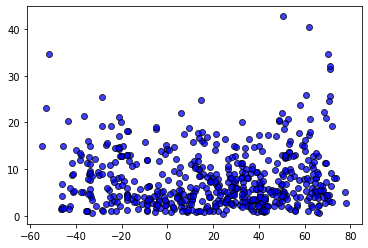

In [32]:
weather=weather.rename(columns={"Wind_Speed":"Speed"})
plt.scatter(weather.Lat,weather.Speed,marker="o", facecolors="blue", edgecolors="black",alpha=0.75)
plt.show()
plt.savefig(WindVsLat.png)

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [34]:
# Create Northern and Southern Hemisphere DataFrames
weather['Hemisphere'] = np.where(weather['Lat']>=0, 'North', 'South')
weather.head()

Northdf = weather.loc[weather['Hemisphere'] != 'South']
Southdf = weather.loc[weather['Hemisphere'] != 'North']


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

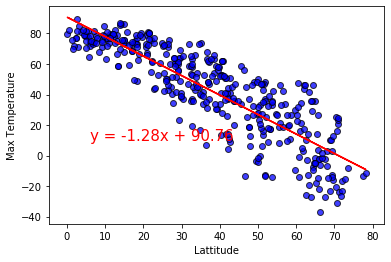

The r-squared is: -0.8604298552717006


In [35]:
x_values = Northdf['Lat']
y_values = Northdf['MaxTemp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(Northdf.Lat,Northdf.Temp,marker="o", facecolors="blue", edgecolors="black",alpha=0.75)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Max Temperature')


plt.show()
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

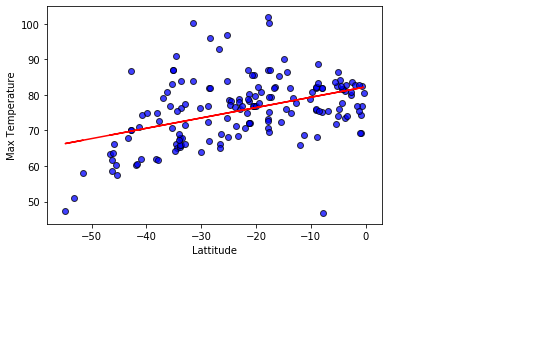

The r-squared is: 0.430490266258049


In [36]:
x_values = Southdf['Lat']
y_values = Southdf['MaxTemp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(Southdf.Lat,Southdf.Temp,marker="o", facecolors="blue", edgecolors="black",alpha=0.75)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Max Temperature')


plt.show()
print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

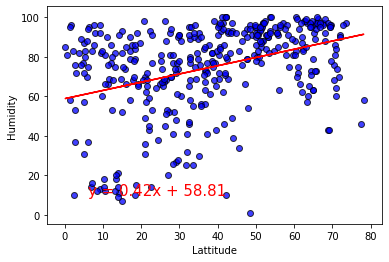

The r-squared is: 0.3705984837536867


In [37]:
x_values = Northdf['Lat']
y_values = Northdf['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(Northdf.Lat,Northdf.Humidity,marker="o", facecolors="blue", edgecolors="black",alpha=0.75)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Humidity')


plt.show()
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

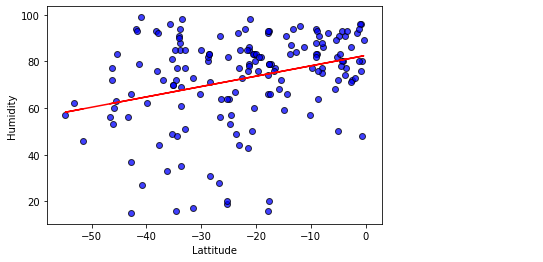

The r-squared is: 0.3104895736971907


In [38]:
x_values = Southdf['Lat']
y_values = Southdf['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(Southdf.Lat,Southdf.Humidity,marker="o", facecolors="blue", edgecolors="black",alpha=0.75)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Humidity')


plt.show()
print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.31080522490772056


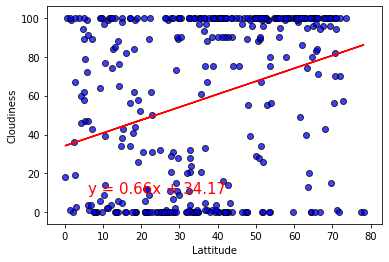

In [39]:
x_values = Northdf['Lat']
y_values = Northdf['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(Northdf.Lat,Northdf.Cloudiness,marker="o", facecolors="blue", edgecolors="black",alpha=0.75)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness')

print(f"The r-squared is: {rvalue}")
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

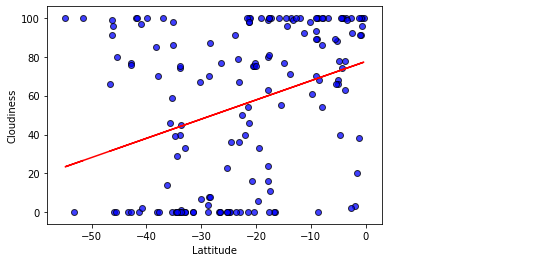

The r-squared is: 0.33404296335525613


In [40]:
x_values = Southdf['Lat']
y_values = Southdf['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(Southdf.Lat,Southdf.Cloudiness,marker="o", facecolors="blue", edgecolors="black",alpha=0.75)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness')


plt.show()
print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1861872463019394


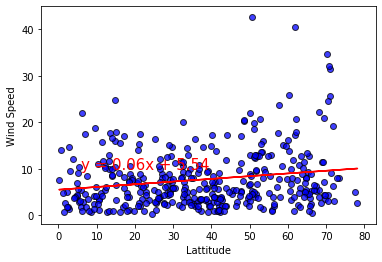

In [41]:
x_values = Northdf['Lat']
y_values = Northdf['Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(Northdf.Lat,Northdf.Speed,marker="o", facecolors="blue", edgecolors="black",alpha=0.75)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Wind Speed')



print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

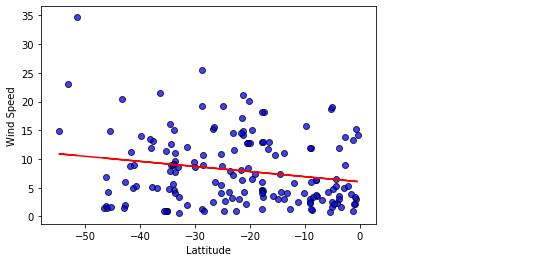

The r-squared is: -0.19906483470956957


In [42]:
x_values = Southdf['Lat']
y_values = Southdf['Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(Southdf.Lat,Southdf.Speed,marker="o", facecolors="blue", edgecolors="black",alpha=0.75)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Wind Speed')


plt.show()
print(f"The r-squared is: {rvalue}")

In [43]:
weather.head()

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Temp,Speed,Hemisphere
0,0,Kapaa,89,US,1579990269,59,22.08,-159.32,75.99,7.96,North
1,1,Bluff,66,NZ,1579990266,56,-46.60,168.33,63.43,1.54,South
2,2,Bredasdorp,0,ZA,1579990062,72,-34.53,20.04,66.20,16.11,South
3,3,Kahului,6,US,1579990288,70,20.89,-156.47,79.00,14.00,North
4,4,Hermanus,29,ZA,1579990267,77,-34.42,19.23,64.99,8.99,South


In [ ]:
## OBSERVABLE TRENDS
# 1. The farther away from 0 Lat, the higher the Wind, Cloud, and Humidity levels are, 
#   although the rate for the Southern Hemisphere is slightly larger than that of the North.

# 2. Temperature has a higher rate from 0 Lat in the Northern Hemisphere.

# 3. Highest wind speeds occur at around 50 and -50 Lats in each hemisphere respectively 